##Customer Transaction Success Prediction

In [0]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
import sklearn
from google.colab import files
import copy
import scipy
from scipy.stats import pearsonr

#Data Preparation

In [0]:
# upload CSV file
#data_to_load = files.upload()
#!ls

In [0]:
# copy the csv file to dataframe.
dataset = pd.read_csv('/content/drive/My Drive/scry_event_alldata.csv')

In [0]:
# explore the dataset
dataset.head()

dateHourMinute  sessionDurationBucket  ... session_evening  session_morning
0    201804031151                      1  ...               0                1
1    201804141014                      3  ...               0                1
2    201804141045                      1  ...               0                1
3    201804231929                      2  ...               1                0
4    201806061033                      1  ...               0                1

[5 rows x 127 columns]

In [0]:
dataset.describe()

dateHourMinute  sessionDurationBucket  ...  session_evening  session_morning
count    6.084500e+04           60845.000000  ...     60845.000000     60845.000000
mean     2.018049e+11             427.845608  ...         0.347161         0.268042
std      9.631390e+05             748.909833  ...         0.476071         0.442943
min      2.018032e+11               1.000000  ...         0.000000         0.000000
25%      2.018041e+11              77.000000  ...         0.000000         0.000000
50%      2.018051e+11             191.000000  ...         0.000000         0.000000
75%      2.018060e+11             433.000000  ...         1.000000         1.000000
max      2.018062e+11            8475.000000  ...         1.000000         1.000000

[8 rows x 125 columns]

In [0]:
dataset.info()
# dataset has float64(5), int64(120), object(2)
# Columns: 127 entries
# RangeIndex: 60845 entries, 0 to 60844

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60845 entries, 0 to 60844
Columns: 127 entries, dateHourMinute to session_morning
dtypes: float64(5), int64(120), object(2)
memory usage: 59.0+ MB


#Exploratory data analysis & Feature Selection

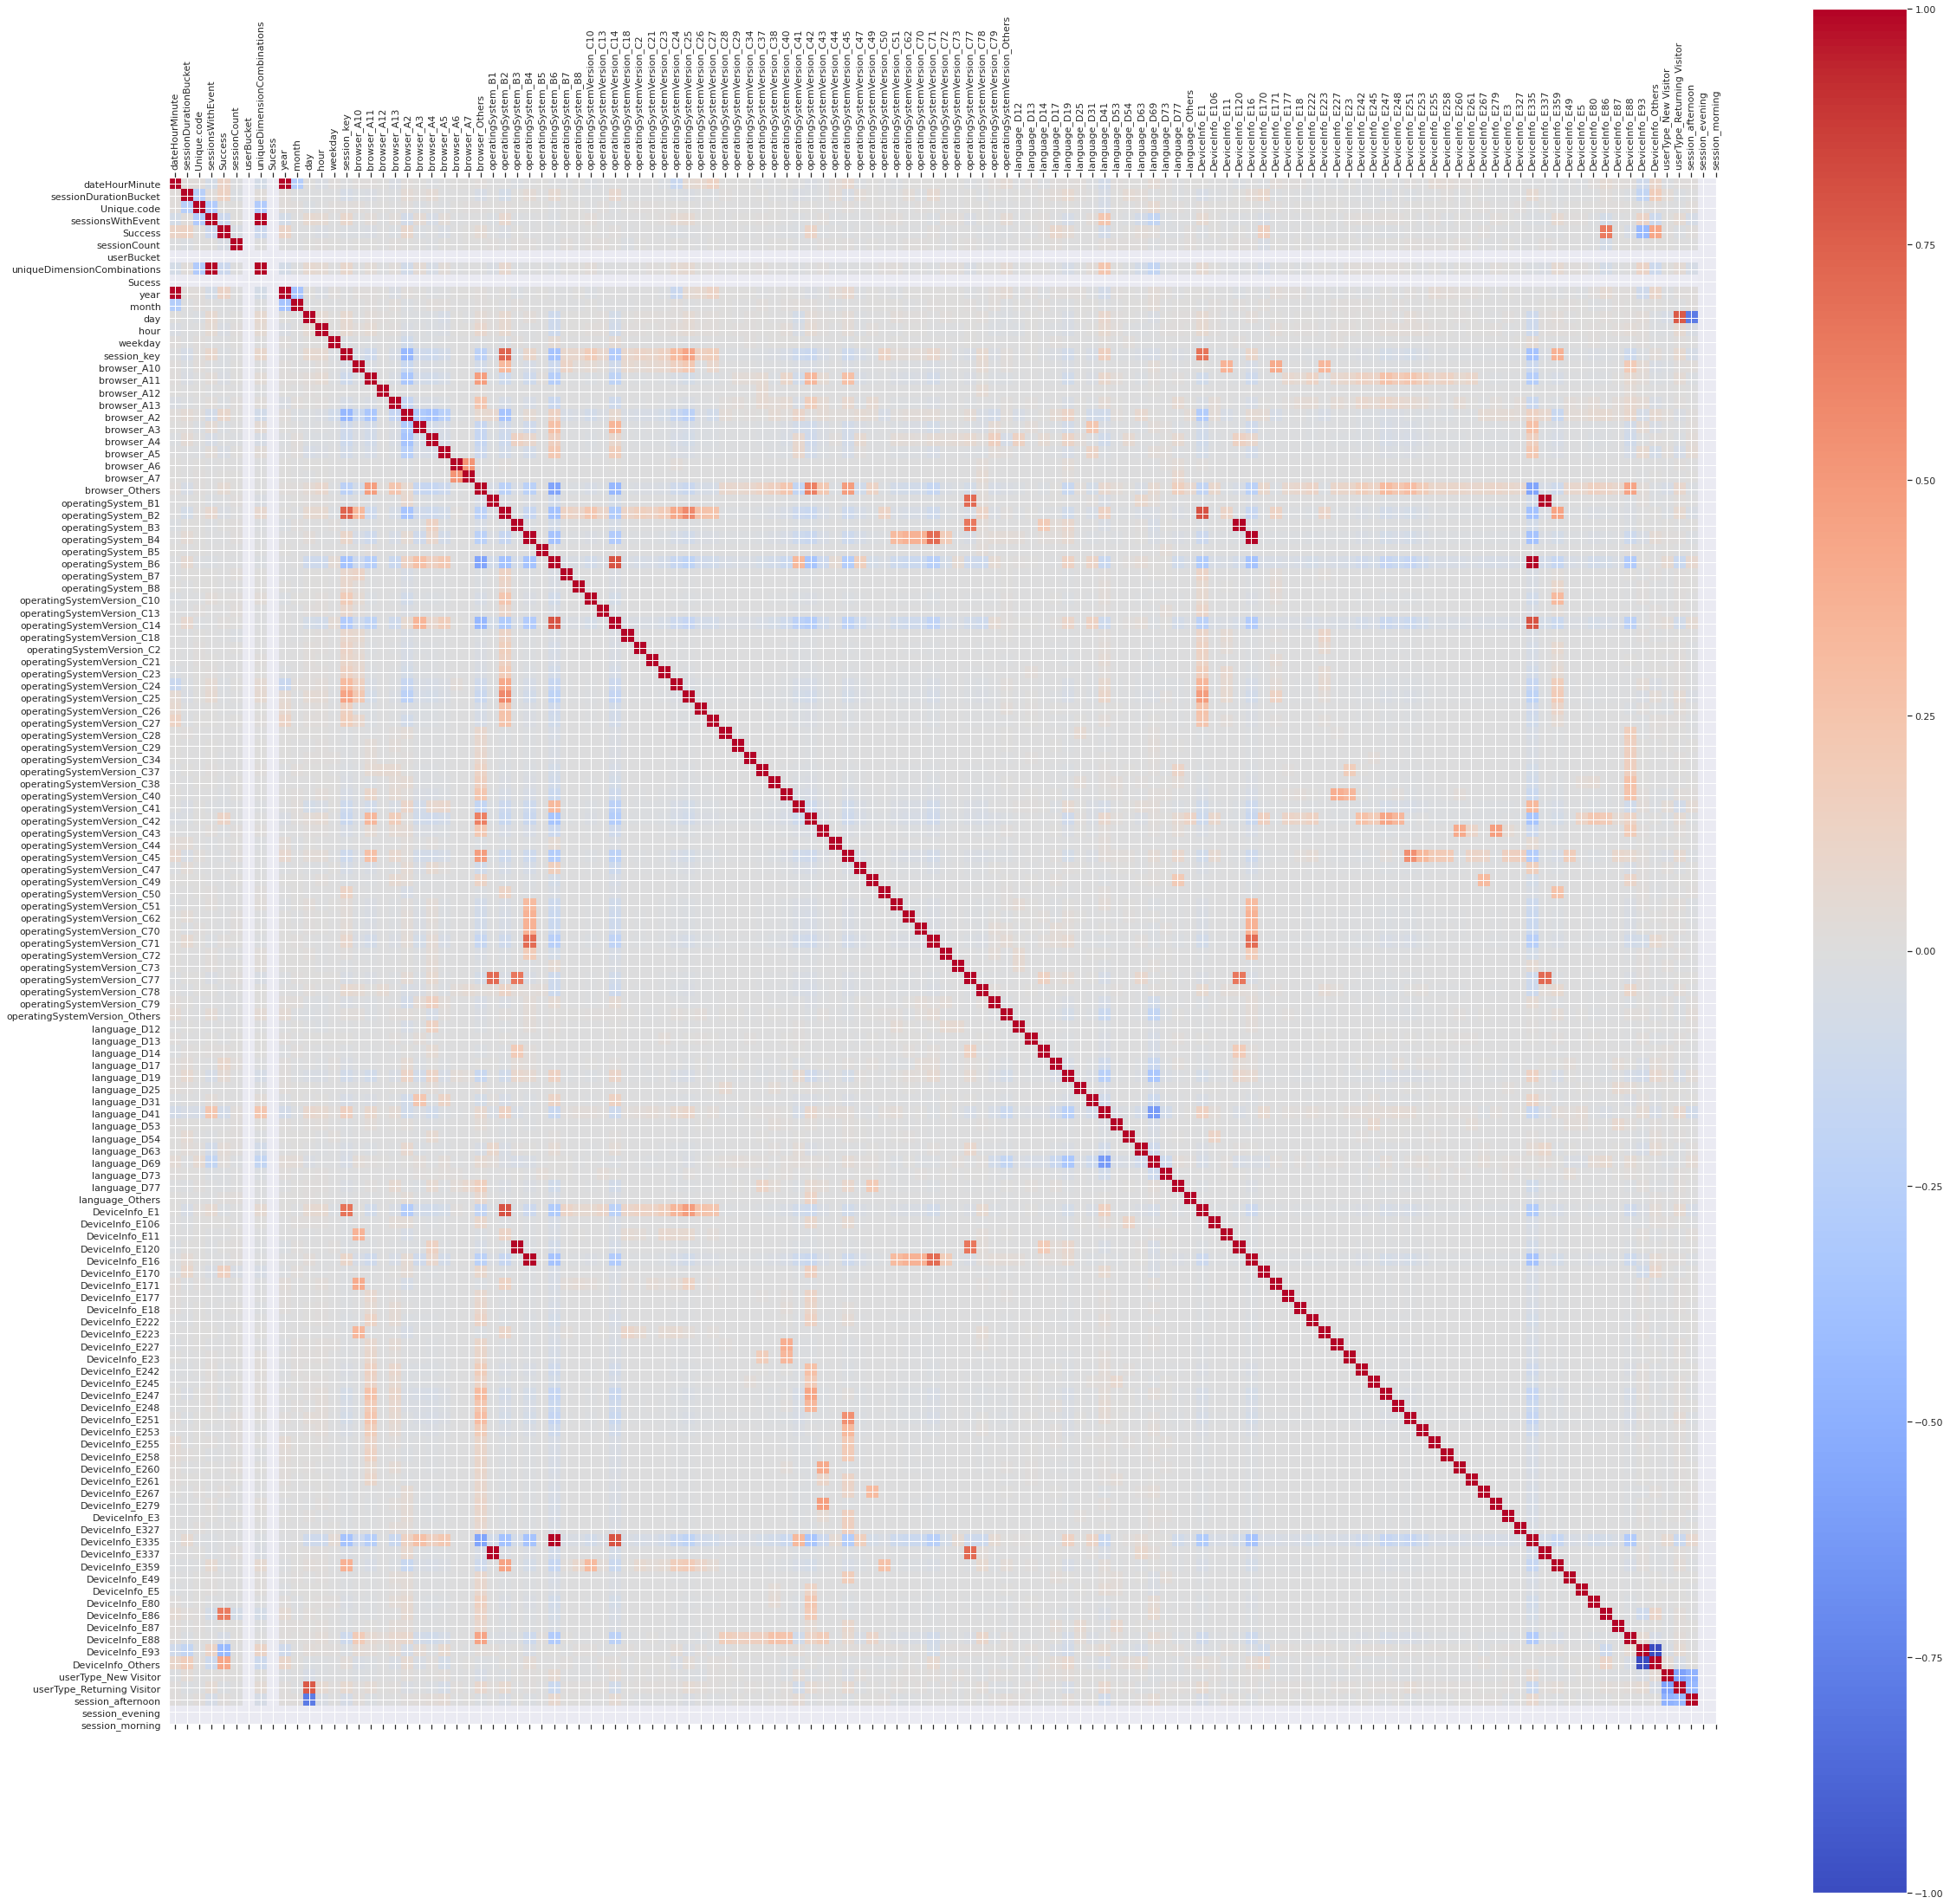

In [0]:
corr = dataset.corr()
fig = plt.figure(figsize=(40, 40))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(dataset.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(dataset.columns)
ax.set_yticklabels(dataset.columns)
plt.show()

In [0]:
dataset.head()

dateHourMinute  sessionDurationBucket  ... session_evening  session_morning
0    201804031151                      1  ...               0                1
1    201804141014                      3  ...               0                1
2    201804141045                      1  ...               0                1
3    201804231929                      2  ...               1                0
4    201806061033                      1  ...               0                1

[5 rows x 127 columns]

In [0]:
# create a copy of the original dataset
dataset1 = copy.copy(dataset)

In [0]:
#Dropping 'Sucess' column from the dataframe as it is subset of 'Success' column and not adding any additional value
#Dropping 'Session_key' as there is no corelation with the prediction. 
#Dropping 'Unique.code' as there is no corelation with the prediction. 
dataset2 = dataset1.drop(['Sucess','session_key','Unique.code'], axis =1)

In [0]:
# Checking the data type
list(set(dataset2.dtypes.tolist()))

[dtype('float64'), dtype('int64')]

In [0]:
dataset2.tail()

dateHourMinute  sessionDurationBucket  ...  session_evening  session_morning
60840    201804051104                     99  ...                0                1
60841    201804051106                     99  ...                0                1
60842    201804051121                    127  ...                0                1
60843    201804051146                    104  ...                0                1
60844    201804051313                     67  ...                0                0

[5 rows x 124 columns]

In [0]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60845 entries, 0 to 60844
Columns: 124 entries, dateHourMinute to session_morning
dtypes: float64(4), int64(120)
memory usage: 57.6 MB


In [0]:
# Dropping the duplicates 
dataset3 = dataset2.drop_duplicates()
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60843 entries, 0 to 60844
Columns: 124 entries, dateHourMinute to session_morning
dtypes: float64(4), int64(120)
memory usage: 58.0 MB


In [0]:
# Finding the null values
print(dataset3.isnull().sum())

dateHourMinute                   0
sessionDurationBucket            0
sessionsWithEvent                0
Success                       5459
sessionCount                     8
                              ... 
userType_New Visitor             0
userType_Returning Visitor       0
session_afternoon                0
session_evening                  0
session_morning                  0
Length: 124, dtype: int64


In [0]:
dataset3.shape

(60843, 124)

In [0]:
# Dropping the missing values.
#dataset4 = dataset3.dropna(subset = ['Success'])
dataset4 = dataset3.dropna() 
dataset4.count()

dateHourMinute                55381
sessionDurationBucket         55381
sessionsWithEvent             55381
Success                       55381
sessionCount                  55381
                              ...  
userType_New Visitor          55381
userType_Returning Visitor    55381
session_afternoon             55381
session_evening               55381
session_morning               55381
Length: 124, dtype: int64

In [0]:
dataset4.shape

(55381, 124)

In [0]:
# After dropping the values
print(dataset4.isnull().sum())

dateHourMinute                0
sessionDurationBucket         0
sessionsWithEvent             0
Success                       0
sessionCount                  0
                             ..
userType_New Visitor          0
userType_Returning Visitor    0
session_afternoon             0
session_evening               0
session_morning               0
Length: 124, dtype: int64


In [0]:
# Check the shape of the dataset
dataset4.shape

(55381, 124)

In [0]:
#Pearson correlation
#r_row, p_value = pearsonr(dataset4['Success'], dataset4['month'])
#print('r_row: \n', r_row)
#print('p_value: \n', p_value < 0.001)

In [0]:
def correlation(dataf, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataf.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataf.columns:
                    del dataf[colname] # deleting the column from the dataset
                    print(colname)
    print(dataf)

In [0]:
correlation(dataset4, 0.95)

month
DeviceInfo_E170
DeviceInfo_E171
DeviceInfo_E359
DeviceInfo_E49
       dateHourMinute  sessionDurationBucket  ...  session_evening  session_morning
0        201804031151                      1  ...                0                1
1        201804141014                      3  ...                0                1
2        201804141045                      1  ...                0                1
3        201804231929                      2  ...                1                0
4        201806061033                      1  ...                0                1
...               ...                    ...  ...              ...              ...
60838    201804051030                    278  ...                0                1
60840    201804051104                     99  ...                0                1
60842    201804051121                    127  ...                0                1
60843    201804051146                    104  ...                0                1
60844  

In [0]:
dataset4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55381 entries, 0 to 60844
Columns: 119 entries, dateHourMinute to session_morning
dtypes: float64(4), int64(115)
memory usage: 50.7 MB


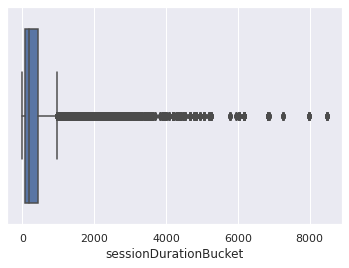

In [0]:
# Detecting outliers
sns.boxplot(x=dataset4['sessionDurationBucket'])

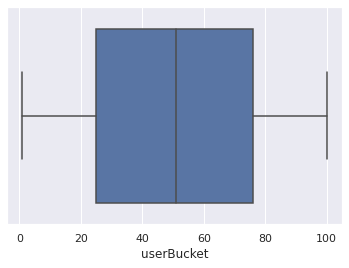

In [0]:
sns.boxplot(x=dataset4['userBucket'])

In [0]:
# Calculating IQR
Q1 = dataset4.quantile(0.25)
Q3 = dataset4.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
#df = dataset4[~((dataset4 < (Q1 - 1.5 * IQR)) |(dataset4 > (Q3 + 1.5 * IQR))).any(axis=1)]
#df.shape - (5999,120)
#Data has outliers and it is scattered for sessionDurationbucket so not removing outliers using IRQ calculation

dateHourMinute                1879746.0
sessionDurationBucket             356.0
sessionsWithEvent                   1.0
Success                             1.0
sessionCount                        0.0
                                ...    
userType_New Visitor                0.0
userType_Returning Visitor          0.0
session_afternoon                   1.0
session_evening                     1.0
session_morning                     1.0
Length: 119, dtype: float64


In [0]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     \ 44.0MB 1.5MB/s
     |████████████████████████████████| 61kB 3.1MB/s 
     |████████████████████████████████| 604kB 8.4MB/s 
     |████████████████████████████████| 3.1MB 37.5MB/s 
     |████████████████████████████████| 71kB 9.4MB/s 
     |████████████████████████████████| 296kB 41.4MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.8.0-py2.py3-none-any.whl size=259932 sha256=3ccbbc0dc0c36a51b16023c387bb3f049f8cc5b279e7dd151d07f9218283f743
  Stored in directory: /tmp/pip-ephem-wheel-cache-p2mbdr7h/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
  Created wheel for confuse: filename=confuse-1.1.0-cp36-none-any.whl size=17574 sha256=ba02a81920c438de6371afc3755811dd7de0eca6a2ec0e03c5c66559ceba0dfd
  Stored in directory: /root/.cache/pip/wheels/f6/8b/23/41a1b516f6d8d4cc81f5bdb55394a47cdbe9659c53668d3c9e
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=25070936579f538c8231280d19f0f255317e8f75f323d6d871a2e

In [0]:
from pandas_profiling import ProfileReport

In [0]:
profile = ProfileReport(dataset4, title='Pandas Profiling Report', explorative=True)
profile.to_notebook_iframe()

In [0]:
profile.to_file("your_report.html")

In [0]:
dataset4.describe()

dateHourMinute  sessionDurationBucket  ...  session_evening  session_morning
count    5.538100e+04           55381.000000  ...     55381.000000     55381.000000
mean     2.018049e+11             426.516170  ...         0.346906         0.268341
std      9.633400e+05             744.395398  ...         0.475990         0.443100
min      2.018032e+11               1.000000  ...         0.000000         0.000000
25%      2.018041e+11              77.000000  ...         0.000000         0.000000
50%      2.018051e+11             191.000000  ...         0.000000         0.000000
75%      2.018060e+11             433.000000  ...         1.000000         1.000000
max      2.018062e+11            8475.000000  ...         1.000000         1.000000

[8 rows x 119 columns]

In [0]:
# After looking at Profile Report dropping 'uniqueDimensionCombinations' column as it has constant value '1.0'
dataset5 = dataset4.drop(['uniqueDimensionCombinations','dateHourMinute','year'], axis =1)

In [0]:
dataset5.head()

sessionDurationBucket  sessionsWithEvent  ...  session_evening  session_morning
0                      1                  1  ...                0                1
1                      3                  1  ...                0                1
2                      1                  1  ...                0                1
3                      2                  1  ...                1                0
4                      1                  1  ...                0                1

[5 rows x 116 columns]

In [0]:
#Scale the values between 0 and 1 in the dataframe
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

min_max_scaler = preprocessing.MinMaxScaler()

def scaleMinMax(df, cols_to_scale):
    for col in cols_to_scale:
        df[col] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(df[col])),columns=[col])
    return df

In [0]:
from sklearn import preprocessing
QT = preprocessing.QuantileTransformer(n_quantiles=10, random_state=0)

def scaleQT(df, cols_to_scale):
    for col in cols_to_scale:
        df[col] = pd.DataFrame(QT.fit_transform(pd.DataFrame(df[col])),columns=[col])
    return df

In [0]:
#scaled_dataset = scaleMinMax(dataset5,['userBucket','sessionCount','weekday'])
#scaled_dataset2 = scaleQT(scaled_dataset,['sessionDurationBucket'])

In [0]:
#scaled_dataset2.head()

In [0]:
#scaled_dataset2.describe()

sessionDurationBucket  ...  session_morning
count           51546.000000  ...     55381.000000
mean                0.488882  ...         0.268341
std                 0.285368  ...         0.443100
min                 0.000000  ...         0.000000
25%                 0.252723  ...         0.000000
50%                 0.495446  ...         0.000000
75%                 0.741996  ...         1.000000
max                 1.000000  ...         1.000000

[8 rows x 116 columns]

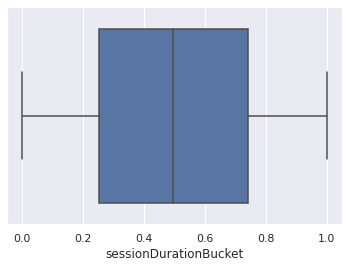

In [0]:
# boxplot
#sns.boxplot(x=scaled_dataset2['sessionDurationBucket'])

In [0]:
#sns.boxplot(x=scaled_dataset2['dateHourMinute'])

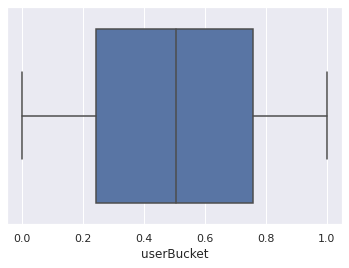

In [0]:
#sns.boxplot(x=scaled_dataset2['userBucket'])

In [0]:
#scaled_dataset2.shape
dataset5.shape

(55381, 116)

In [0]:
#print(scaled_dataset2.isnull().sum())
print(dataset5.isnull().sum())

sessionDurationBucket         0
sessionsWithEvent             0
Success                       0
sessionCount                  0
userBucket                    0
                             ..
userType_New Visitor          0
userType_Returning Visitor    0
session_afternoon             0
session_evening               0
session_morning               0
Length: 116, dtype: int64


In [0]:
# Dropping the missing values.
#final_dataset = scaled_dataset2.dropna() 
final_dataset = dataset5.dropna() 
final_dataset.count()

sessionDurationBucket         55381
sessionsWithEvent             55381
Success                       55381
sessionCount                  55381
userBucket                    55381
                              ...  
userType_New Visitor          55381
userType_Returning Visitor    55381
session_afternoon             55381
session_evening               55381
session_morning               55381
Length: 116, dtype: int64

In [0]:
# After dropping the values
print(final_dataset.isnull().sum())

sessionDurationBucket         0
sessionsWithEvent             0
Success                       0
sessionCount                  0
userBucket                    0
                             ..
userType_New Visitor          0
userType_Returning Visitor    0
session_afternoon             0
session_evening               0
session_morning               0
Length: 116, dtype: int64


In [0]:
df = copy.copy(final_dataset)

In [0]:
df.to_csv (r'final_dataset.csv', index = False, header=True)

In [0]:
!ls

drive  final_dataset.csv  sample_data


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55381 entries, 0 to 60844
Columns: 116 entries, sessionDurationBucket to session_morning
dtypes: float64(3), int64(113)
memory usage: 49.4 MB


In [0]:
x = df

In [0]:
y = x.pop('Success')

In [0]:
x.shape

(55381, 115)

In [0]:
y.shape

(55381,)

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [0]:
# Standardize the feature matrix
X = StandardScaler().fit_transform(x)

In [0]:
# Create a PCA that will retain 99% of the variance
pca = PCA(n_components=0.99, whiten=True)

# Conduct PCA
X_pca = pca.fit_transform(X)

In [0]:
# Show results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_pca.shape[1])

Original number of features: 115
Reduced number of features: 99


In [0]:
X_pca.shape

(55381, 99)

In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
X_ftrain, X_ftest, y_ftrain, y_ftest = train_test_split(X_pca, y, test_size = 0.1, random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X_ftrain, y_ftrain, test_size = 0.2, random_state = 0)

##Model Selecting - Training - Scoring

> Indented block



## Building Model1


In [0]:
# Fitting Simple logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(max_iter=1000,solver='liblinear')
model1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Predicting the Test set results
y_pred = model1.predict(X_test)

In [0]:
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix 

In [0]:
y_train_hat = model1.predict(X_train)
y_train_hat_probs = model1.predict_proba(X_train)[:,1]
train_accuracy = accuracy_score(y_train, y_train_hat)*100
train_auc_roc = roc_auc_score(y_train, y_train_hat_probs)*100
print('Confusion matrix:\n', confusion_matrix(y_train, y_train_hat))
print('Training accuracy: %.4f %%' % train_accuracy)
print('Training AUC: %.4f %%' % train_auc_roc)

Confusion matrix:
 [[ 9564  7961]
 [ 4378 17970]]
Training accuracy: 69.0542 %
Training AUC: 73.9425 %


In [0]:
y_test_hat = model1.predict(X_test)
y_test_hat_probs = model1.predict_proba(X_test)[:,1]
test_accuracy = accuracy_score(y_test, y_test_hat)*100
test_auc_roc = roc_auc_score(y_test, y_test_hat_probs)*100
print('Confusion matrix:\n', confusion_matrix(y_test, y_test_hat))
print('Testing accuracy: %.4f %%' % test_accuracy)
print('Testing AUC: %.4f %%' % test_auc_roc)

Confusion matrix:
 [[2318 1990]
 [1178 4483]]
Testing accuracy: 68.2215 %
Testing AUC: 73.1132 %


In [0]:
print(classification_report(y_test, y_test_hat, digits=6))

              precision    recall  f1-score   support

         0.0   0.663043  0.538069  0.594054      4308
         1.0   0.692569  0.791910  0.738915      5661

    accuracy                       0.682215      9969
   macro avg   0.677806  0.664989  0.666485      9969
weighted avg   0.679810  0.682215  0.676315      9969



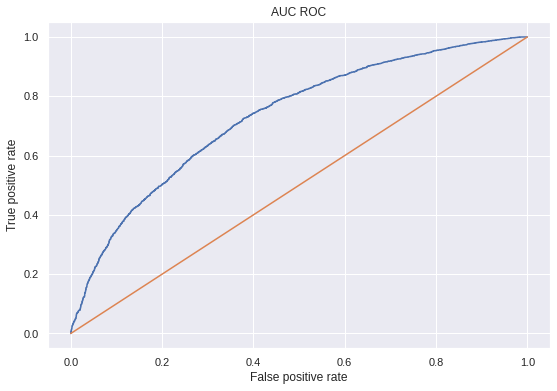

In [0]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_hat_probs, drop_intermediate=True)

f, ax = plt.subplots(figsize=(9, 6))
_ = plt.plot(fpr, tpr, [0,1], [0, 1])
_ = plt.title('AUC ROC')
_ = plt.xlabel('False positive rate')
_ = plt.ylabel('True positive rate')
plt.style.use('seaborn')

plt.savefig('auc_roc.png', dpi=600)

**Model1**

Training accuracy: 69.2211 %
Training AUC: 74.7370 %
Testing accuracy: 69.4180 %
Testing AUC: 75.1871 %

Tested with maxitter 10000 but not much change in accuracy
and with liblinear and lbgf solver but not much change in accuracy


#Building Model2

In [0]:
# Fitting Simple logistic Regression to the Training set
from sklearn.linear_model import SGDClassifier
model2 = SGDClassifier(loss="modified_huber", max_iter=10000)
model2.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='modified_huber',
              max_iter=10000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
# Predicting the Test set results
y_pred2 = model2.predict(X_test)

In [0]:
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix 

In [0]:
y_train_hat2 = model2.predict(X_train)
y_train_hat_probs2 = model2.predict_proba(X_train)[:,1]
train_accuracy2 = accuracy_score(y_train, y_train_hat2)*100
train_auc_roc2 = roc_auc_score(y_train, y_train_hat_probs2)*100
print('Confusion matrix2:\n', confusion_matrix(y_train, y_train_hat2))
print('Training accuracy2: %.4f %%' % train_accuracy2)
print('Training AUC2: %.4f %%' % train_auc_roc2)

Confusion matrix2:
 [[ 9846  7679]
 [ 6501 15847]]
Training accuracy2: 64.4371 %
Training AUC2: 68.1166 %


In [0]:
y_test_hat2 = model2.predict(X_test)
y_test_hat_probs2 = model2.predict_proba(X_test)[:,1]
test_accuracy2 = accuracy_score(y_test, y_test_hat2)*100
test_auc_roc2 = roc_auc_score(y_test, y_test_hat_probs2)*100
print('Confusion matrix2:\n', confusion_matrix(y_test, y_test_hat2))
print('Testing accuracy2: %.4f %%' % test_accuracy2)
print('Testing AUC2: %.4f %%' % test_auc_roc2)

Confusion matrix2:
 [[2420 1888]
 [1659 4002]]
Testing accuracy2: 64.4197 %
Testing AUC2: 67.7124 %


In [0]:
print(classification_report(y_test, y_test_hat2, digits=6))

              precision    recall  f1-score   support

         0.0   0.593283  0.561746  0.577084      4308
         1.0   0.679457  0.706942  0.692927      5661

    accuracy                       0.644197      9969
   macro avg   0.636370  0.634344  0.635005      9969
weighted avg   0.642217  0.644197  0.642866      9969



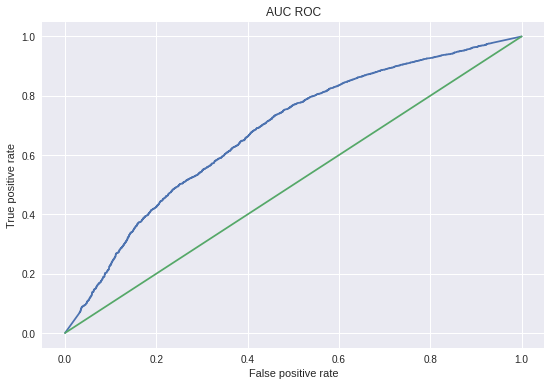

In [0]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_hat_probs2, drop_intermediate=True)

f, ax = plt.subplots(figsize=(9, 6))
_ = plt.plot(fpr, tpr, [0,1], [0, 1])
_ = plt.title('AUC ROC')
_ = plt.xlabel('False positive rate')
_ = plt.ylabel('True positive rate')
plt.style.use('seaborn')

plt.savefig('auc_roc.png', dpi=600)

#Building Model3

In [0]:
# Fitting Simple logistic Regression to the Training set
from sklearn.svm import SVC
model3 = SVC(kernel='rbf')
model3.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
# Predicting the Test set results
y_pred3 = model3.predict(X_test)

In [0]:
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix 

In [0]:
y_train_hat3 = model3.predict(X_train)
#y_train_hat_probs3 = model3.predict_proba(X_train)[:,1]
train_accuracy3 = accuracy_score(y_train, y_train_hat3)*100
#train_auc_roc3 = roc_auc_score(y_train, y_train_hat_probs3)*100
print('Confusion matrix3:\n', confusion_matrix(y_train, y_train_hat3))
print('Training accuracy3: %.4f %%' % train_accuracy3)
#print('Training AUC3: %.4f %%' % train_auc_roc3)

Confusion matrix3:
 [[10126  7399]
 [ 3529 18819]]
Training accuracy3: 72.5930 %


In [0]:
y_test_hat3 = model3.predict(X_test)
test_accuracy3 = accuracy_score(y_test, y_test_hat3)*100
print('Confusion matrix3:\n', confusion_matrix(y_test, y_test_hat3))
print('Testing accuracy3: %.4f %%' % test_accuracy3)

Confusion matrix3:
 [[2388 1920]
 [ 991 4670]]
Testing accuracy3: 70.7995 %


In [0]:
print(classification_report(y_test, y_test_hat3, digits=6))

              precision    recall  f1-score   support

         0.0   0.706718  0.554318  0.621309      4308
         1.0   0.708649  0.824943  0.762387      5661

    accuracy                       0.707995      9969
   macro avg   0.707684  0.689630  0.691848      9969
weighted avg   0.707815  0.707995  0.701421      9969



#Building Model4

In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'solver': ['lbfgs'], 'max_iter': [1000], 'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':np.arange(10, 100), 'random_state':[0,1,2,3,4,5,6,7,8,9]}
#clf = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)
clf = GridSearchCV(estimator=MLPClassifier(),
                  param_grid=parameters,
                  scoring='accuracy',
                  cv=10,
                  n_jobs=-1,
                  verbose=0)

clf.fit(X_train, y_train)
print("Training set score: %f" % clf.score(X_train, y_train))
print("Test set score: %f" % clf.score(X_test, y_test))
print(clf.best_params_)

In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

alpha_vals = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]

param_grid = [
    {
        'alpha': alpha_vals
    }
]

mlp = MLPClassifier(solver='sgd',
                           hidden_layer_sizes=(100,),
                           alpha=1e-4,
                           random_state=1,
                           verbose=10,
                           tol=1e-4,
                           learning_rate_init=0.1,
                           max_iter=200)

gs = GridSearchCV(estimator=mlp,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10,
                  n_jobs=-1,
                  verbose=0)

gs = gs.fit(X_train, y_train)

mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Iteration 1, loss = 0.61371172
Iteration 2, loss = 0.58144756
Iteration 3, loss = 0.56015228
Iteration 4, loss = 0.53644507
Iteration 5, loss = 0.51802401
Iteration 6, loss = 0.50485647
Iteration 7, loss = 0.49394426
Iteration 8, loss = 0.48677856
Iteration 9, loss = 0.48292091
Iteration 10, loss = 0.47488472
Iteration 11, loss = 0.46935586
Iteration 12, loss = 0.46301230
Iteration 13, loss = 0.45635844
Iteration 14, loss = 0.45290045
Iteration 15, loss = 0.44896469
Iteration 16, loss = 0.44455917
Iteration 17, loss = 0.44162317
Iteration 18, loss = 0.43568815
Iteration 19, loss = 0.43351684
Iteration 20, loss = 0.43121274
Iteration 21, loss = 0.42507756
Iteration 22, loss = 0.42600272
Iteration 23, loss = 0.42264646
Iteration 24, loss = 0.41760195
Iteration 25, loss = 0.41683313
Iteration 26, loss = 0.41697589
Iteration 27, loss = 0.41161248
Iteration 28, loss = 0.40924953
Iteration 29, loss = 0.40792264
Iteration 30, loss = 0.40421585
Iteration 31, loss = 0.40246117
Iteration 32, los

In [0]:
print("Test set score: %f" % mlp.score(X_ftest, y_ftest))

Test set score: 0.807366


#Building Model5

In [0]:
# MLP model
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import RMSprop

Using TensorFlow backend.


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


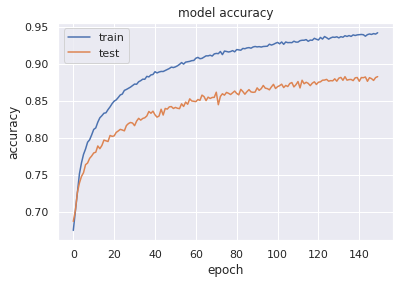

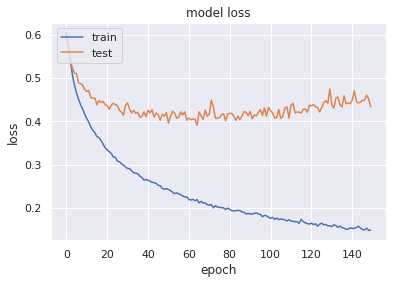

In [0]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy
# create model
model = Sequential()
model.add(Dense(64, input_dim=99, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history = model.fit(X_ftrain, y_ftrain, validation_split=0.33, epochs=150, batch_size=10, verbose=0)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
test_loss, test_acc = model.evaluate(X_ftest, y_ftest)
print('Test accuracy:', test_acc)

5539/5539 [==============================] - 0s 44us/step
Test accuracy: 0.8831918835639954


In the above model need to avoid overfitting using regularization

Train on 33394 samples, validate on 16448 samples
Epoch 1/1000
 - 1s - loss: 0.6437 - accuracy: 0.6139 - val_loss: 0.6008 - val_accuracy: 0.6811
Epoch 2/1000
 - 1s - loss: 0.5973 - accuracy: 0.6877 - val_loss: 0.5951 - val_accuracy: 0.6890
Epoch 3/1000
 - 1s - loss: 0.5846 - accuracy: 0.6973 - val_loss: 0.5886 - val_accuracy: 0.6908
Epoch 4/1000
 - 1s - loss: 0.5763 - accuracy: 0.7023 - val_loss: 0.5799 - val_accuracy: 0.6979
Epoch 5/1000
 - 1s - loss: 0.5654 - accuracy: 0.7085 - val_loss: 0.5698 - val_accuracy: 0.7051
Epoch 6/1000
 - 1s - loss: 0.5522 - accuracy: 0.7220 - val_loss: 0.5562 - val_accuracy: 0.7161
Epoch 7/1000
 - 1s - loss: 0.5367 - accuracy: 0.7310 - val_loss: 0.5371 - val_accuracy: 0.7343
Epoch 8/1000
 - 1s - loss: 0.5253 - accuracy: 0.7391 - val_loss: 0.5304 - val_accuracy: 0.7376
Epoch 9/1000
 - 1s - loss: 0.5129 - accuracy: 0.7490 - val_loss: 0.5160 - val_accuracy: 0.7474
Epoch 10/1000
 - 1s - loss: 0.5008 - accuracy: 0.7574 - val_loss: 0.5084 - val_accuracy: 0.7531

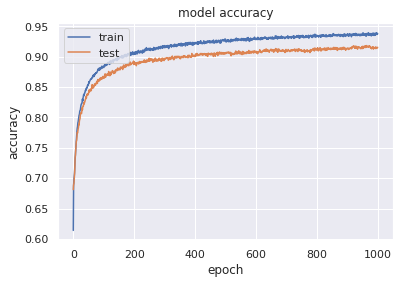

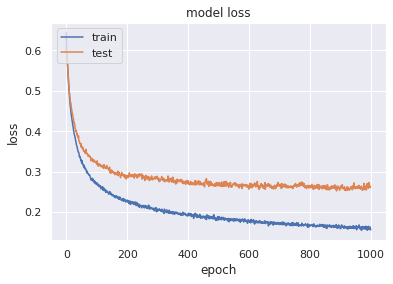

In [0]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy
# create model
model = Sequential()
model.add(Dense(128, input_dim=99, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history = model.fit(X_ftrain, y_ftrain, validation_split=0.33, epochs=1000, batch_size=128, verbose=2)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
# Model has reached 92% accuracy
test_loss, test_acc = model.evaluate(X_ftest, y_ftest)
print('Test accuracy:', test_acc)

5539/5539 [==============================] - 0s 50us/step
Test accuracy: 0.9192994832992554


Train the model longer to improve model accuracy

Streaming output truncated to the last 5000 lines.
Epoch 2502/5000
 - 0s - loss: 0.1392 - accuracy: 0.9470 - val_loss: 0.2461 - val_accuracy: 0.9253
Epoch 2503/5000
 - 0s - loss: 0.1392 - accuracy: 0.9465 - val_loss: 0.2487 - val_accuracy: 0.9261
Epoch 2504/5000
 - 0s - loss: 0.1404 - accuracy: 0.9460 - val_loss: 0.2480 - val_accuracy: 0.9236
Epoch 2505/5000
 - 0s - loss: 0.1450 - accuracy: 0.9449 - val_loss: 0.2417 - val_accuracy: 0.9255
Epoch 2506/5000
 - 0s - loss: 0.1405 - accuracy: 0.9487 - val_loss: 0.2433 - val_accuracy: 0.9267
Epoch 2507/5000
 - 0s - loss: 0.1392 - accuracy: 0.9470 - val_loss: 0.2421 - val_accuracy: 0.9252
Epoch 2508/5000
 - 0s - loss: 0.1406 - accuracy: 0.9455 - val_loss: 0.2527 - val_accuracy: 0.9242
Epoch 2509/5000
 - 0s - loss: 0.1406 - accuracy: 0.9468 - val_loss: 0.2452 - val_accuracy: 0.9258
Epoch 2510/5000
 - 0s - loss: 0.1419 - accuracy: 0.9463 - val_loss: 0.2435 - val_accuracy: 0.9252
Epoch 2511/5000
 - 0s - loss: 0.1403 - accuracy: 0.9475 - val_loss:

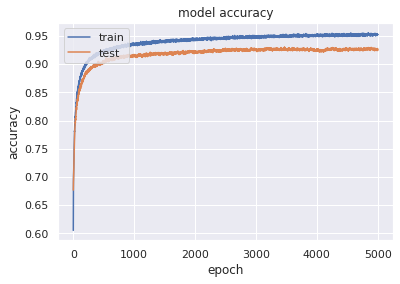

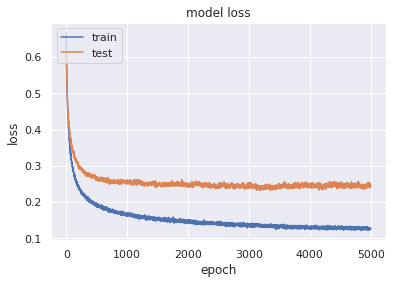

In [0]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy
# create model
model = Sequential()
model.add(Dense(128, input_dim=99, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history = model.fit(X_ftrain, y_ftrain, validation_split=0.33, epochs=5000, batch_size=512, verbose=2)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
# Model accuracy has reached 92.7% accuracy
test_loss, test_acc = model.evaluate(X_ftest, y_ftest)
print('Test accuracy:', test_acc)

5539/5539 [==============================] - 0s 44us/step
Test accuracy: 0.9274237155914307


Model has achieved 92.7% accuracy on test data. Increase model complexity and regularization to improve accuracy.

In [0]:
# Define the optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

Streaming output truncated to the last 5000 lines.
Epoch 2502/5000
 - 0s - loss: 0.0971 - accuracy: 0.9631 - val_loss: 0.2287 - val_accuracy: 0.9334
Epoch 2503/5000
 - 0s - loss: 0.1032 - accuracy: 0.9620 - val_loss: 0.2233 - val_accuracy: 0.9325
Epoch 2504/5000
 - 0s - loss: 0.1021 - accuracy: 0.9620 - val_loss: 0.2236 - val_accuracy: 0.9312
Epoch 2505/5000
 - 0s - loss: 0.0992 - accuracy: 0.9624 - val_loss: 0.2293 - val_accuracy: 0.9317
Epoch 2506/5000
 - 0s - loss: 0.1003 - accuracy: 0.9622 - val_loss: 0.2326 - val_accuracy: 0.9332
Epoch 2507/5000
 - 0s - loss: 0.1006 - accuracy: 0.9617 - val_loss: 0.2300 - val_accuracy: 0.9324
Epoch 2508/5000
 - 0s - loss: 0.0995 - accuracy: 0.9629 - val_loss: 0.2280 - val_accuracy: 0.9311
Epoch 2509/5000
 - 0s - loss: 0.1033 - accuracy: 0.9618 - val_loss: 0.2220 - val_accuracy: 0.9318
Epoch 2510/5000
 - 0s - loss: 0.0990 - accuracy: 0.9635 - val_loss: 0.2338 - val_accuracy: 0.9317
Epoch 2511/5000
 - 0s - loss: 0.0917 - accuracy: 0.9656 - val_loss:

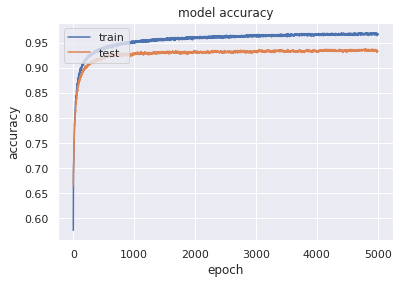

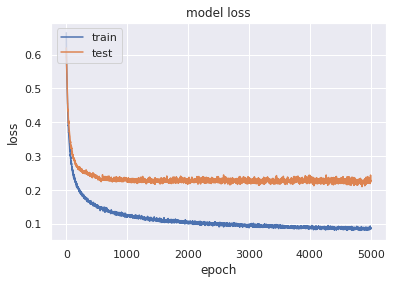

In [0]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy
# create model
model = Sequential()
model.add(Dense(128, input_dim=99, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])
# Fit the model
history = model.fit(X_ftrain, y_ftrain, validation_split=0.33, epochs=5000, batch_size=512, verbose=2)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
# Model accuracy has reached 93.7% accuracy
test_loss, test_acc = model.evaluate(X_ftest, y_ftest)
print('Test accuracy:', test_acc)

5539/5539 [==============================] - 0s 47us/step
Test accuracy: 0.9377143979072571


#Building Model6

In [0]:
# cnn model
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import RMSprop

In [0]:
from numpy import expand_dims

In [0]:
X_train1 = expand_dims(X_train, axis=2)
X_test1 = expand_dims(X_test, axis=2)
y_train1 = expand_dims(y_train, axis=1)
y_test1 = expand_dims(y_test, axis=1)

In [0]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((39873, 99), (9969, 99), (39873,), (9969,))

In [0]:
X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape

((39873, 99, 1), (9969, 99, 1), (39873, 1), (9969, 1))

In [0]:
# Define the optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [0]:
def evaluate_model(trainX, trainy, testX, testy):
  verbose, epochs, batch_size = 2, 1000, 128
  n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
  cnn_model = Sequential()
  cnn_model.add(Conv1D(filters=32, kernel_size=5, activation='relu', kernel_initializer='normal',input_shape=(n_timesteps,n_features)))
  cnn_model.add(Conv1D(filters=32, kernel_size=5, activation='relu',kernel_initializer='normal'))
  cnn_model.add(Dropout(0.1))
  cnn_model.add(MaxPooling1D(pool_size=2))
  cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu',kernel_initializer='normal'))
  cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu',kernel_initializer='normal'))
  cnn_model.add(Dropout(0.1))
  cnn_model.add(MaxPooling1D(pool_size=2))
  cnn_model.add(Flatten())
  cnn_model.add(Dense(128, activation='relu',kernel_initializer='normal'))
  cnn_model.add(Dropout(0.1))
  cnn_model.add(Dense(32, activation='relu',kernel_initializer='normal'))
  cnn_model.add(Dense(1, activation='sigmoid',kernel_initializer='normal'))
  cnn_model.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])
	# fit network
  cnn_model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
	# evaluate cnn_model
  _, accuracy = cnn_model.evaluate(testX, testy, batch_size=batch_size, verbose=2)
  return accuracy

In [0]:
# summarize scores
def summarize_results(scores):
	print(scores)
	m, s = mean(scores), std(scores)
	print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))

In [0]:
# run an experiment
def run_experiment(repeats=10):
	# repeat experiment
	scores = list()
	for r in range(repeats):
		score = evaluate_model(X_train1, y_train1, X_test1, y_test1)
		score = score * 100.0
		print('>#%d: %.3f' % (r+1, score))
		scores.append(score)
	# summarize results
	summarize_results(scores)

In [0]:
# 1st run the experiment
run_experiment()

>#1: 75.554
>#2: 75.665
>#3: 76.457
>#4: 75.534
>#5: 76.367
>#6: 76.106
>#7: 76.668
>#8: 74.692
>#9: 75.665
>#10: 75.745
[75.55421590805054, 75.66456198692322, 76.45701766014099, 75.53415298461914, 76.3667345046997, 76.10592842102051, 76.66767239570618, 74.69154596328735, 75.66456198692322, 75.74480772018433]
Accuracy: 75.845% (+/-0.546)


In [0]:
optimizer = RMSprop(lr=0.003, rho=0.9, epsilon=1e-08, decay=0.0001)

In [0]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_ftrain, y_ftrain, test_size = 0.33, random_state = 0)

In [0]:
X_train1 = expand_dims(X_train2, axis=2)
X_test1 = expand_dims(X_test2, axis=2)
y_train1 = expand_dims(y_train2, axis=1)
y_test1 = expand_dims(y_test2, axis=1)
X_ftrain1 = expand_dims(X_ftrain, axis=2)
y_ftrain1 = expand_dims(y_ftrain, axis=1)
X_ftest1 = expand_dims(X_ftest, axis=2)
y_ftest1 = expand_dims(y_ftest, axis=1)

Train on 33394 samples, validate on 16448 samples
Epoch 1/300
 - 2s - loss: 0.6888 - accuracy: 0.5584 - val_loss: 0.6861 - val_accuracy: 0.5652
Epoch 2/300
 - 2s - loss: 0.6854 - accuracy: 0.5603 - val_loss: 0.6835 - val_accuracy: 0.5652
Epoch 3/300
 - 2s - loss: 0.6804 - accuracy: 0.5605 - val_loss: 0.6760 - val_accuracy: 0.5653
Epoch 4/300
 - 2s - loss: 0.6742 - accuracy: 0.5766 - val_loss: 0.6671 - val_accuracy: 0.6006
Epoch 5/300
 - 2s - loss: 0.6661 - accuracy: 0.5970 - val_loss: 0.6539 - val_accuracy: 0.6156
Epoch 6/300
 - 2s - loss: 0.6610 - accuracy: 0.6069 - val_loss: 0.6500 - val_accuracy: 0.6238
Epoch 7/300
 - 2s - loss: 0.6563 - accuracy: 0.6167 - val_loss: 0.6444 - val_accuracy: 0.6326
Epoch 8/300
 - 2s - loss: 0.6494 - accuracy: 0.6284 - val_loss: 0.6343 - val_accuracy: 0.6418
Epoch 9/300
 - 2s - loss: 0.6413 - accuracy: 0.6373 - val_loss: 0.6285 - val_accuracy: 0.6494
Epoch 10/300
 - 2s - loss: 0.6382 - accuracy: 0.6408 - val_loss: 0.6308 - val_accuracy: 0.6506
Epoch 11/

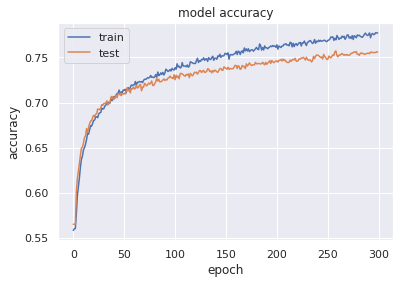

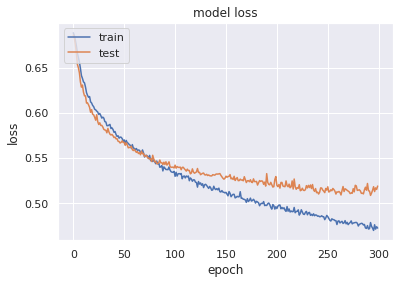

In [0]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy
# create model
n_timesteps, n_features, n_outputs = X_train1.shape[1], X_train1.shape[2], y_train1.shape[1]
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=5, activation='relu',input_shape=(n_timesteps,n_features)))
cnn_model.add(Dropout(0.3))
cnn_model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
cnn_model.add(Dropout(0.3))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
cnn_model.add(Dropout(0.3))
cnn_model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
cnn_model.add(Dropout(0.3))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
cnn_model.add(Dropout(0.3))
cnn_model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
cnn_model.add(Dropout(0.3))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Conv1D(filters=512, kernel_size=3, activation='relu'))
cnn_model.add(Dropout(0.3))
cnn_model.add(Conv1D(filters=512, kernel_size=3, activation='relu'))
cnn_model.add(Dropout(0.3))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(1024, activation='relu'))
cnn_model.add(Dropout(0.3))
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.3))
cnn_model.add(Dense(10, activation='relu'))
cnn_model.add(Dropout(0.3))
cnn_model.add(Dense(1, activation='sigmoid'))
# Compile model
cnn_model.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])
# Fit the model
history = cnn_model.fit(X_ftrain1, y_ftrain1, validation_split=0.33, epochs=300, batch_size=1024, verbose=2)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
|# cnn_model accuracy has reached % accuracy
test_loss, test_acc = cnn_model.evaluate(X_ftest1, y_ftest1)
print('Test accuracy:', test_acc)

5539/5539 [==============================] - 0s 68us/step
Test accuracy: 0.8008666038513184


In [0]:
cnn_model.summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_182 (Conv1D)          (None, 95, 32)            192       
_________________________________________________________________
dropout_231 (Dropout)        (None, 95, 32)            0         
_________________________________________________________________
conv1d_183 (Conv1D)          (None, 91, 32)            5152      
_________________________________________________________________
dropout_232 (Dropout)        (None, 91, 32)            0         
_________________________________________________________________
conv1d_184 (Conv1D)          (None, 87, 64)            10304     
_________________________________________________________________
dropout_233 (Dropout)        (None, 87, 64)            0         
_________________________________________________________________
conv1d_185 (Conv1D)          (None, 83, 64)          